<a href="https://colab.research.google.com/github/AKASH-CR/CognoRise-Infotech/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,r2_score,mean_absolute_error,mean_squared_error

In [24]:

df=pd.read_csv("/content/drive/MyDrive/Cognorise/diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [26]:
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [27]:
encoder=LabelEncoder()
df["gender"]=encoder.fit_transform(df["gender"])
df["smoking_history"]=encoder.fit_transform(df["smoking_history"])

In [28]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [29]:
X=df.iloc[:,:-1]
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


In [30]:
y=df.iloc[:,-1]
y

,diabetes
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [31]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[0.        , 1.        , 0.        , ..., 0.17717087, 0.56363636,
        0.27272727],
       [0.        , 0.67467467, 0.        , ..., 0.20203081, 0.56363636,
        0.        ],
       [0.5       , 0.34934935, 0.        , ..., 0.20203081, 0.4       ,
        0.35454545],
       ...,
       [0.5       , 0.82482482, 0.        , ..., 0.20798319, 0.4       ,
        0.34090909],
       [0.        , 0.2992993 , 0.        , ..., 0.29656863, 0.09090909,
        0.09090909],
       [0.        , 0.71221221, 0.        , ..., 0.14495798, 0.56363636,
        0.04545455]])

In [32]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [33]:
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
lr=LinearRegression()
ada=AdaBoostClassifier()
dt=DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     28230
           1       0.62      0.91      0.74      1770

    accuracy                           0.96     30000
   macro avg       0.81      0.94      0.86     30000
weighted avg       0.97      0.96      0.97     30000



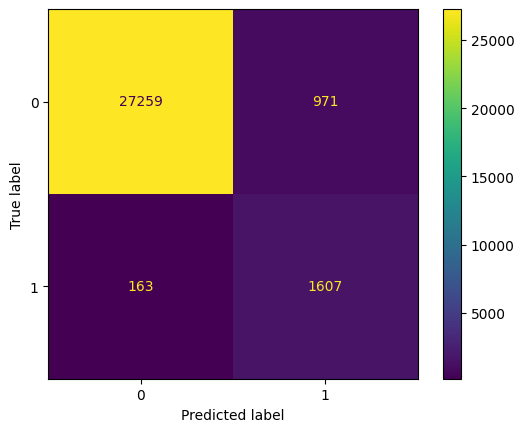

In [34]:
model1=knn.fit(X_train,y_train)
y_pred=model1.predict(X_test)
print(classification_report(y_pred,y_test))
print(ConfusionMatrixDisplay.from_predictions(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     28140
           1       0.69      0.95      0.80      1860

    accuracy                           0.97     30000
   macro avg       0.84      0.96      0.89     30000
weighted avg       0.98      0.97      0.97     30000



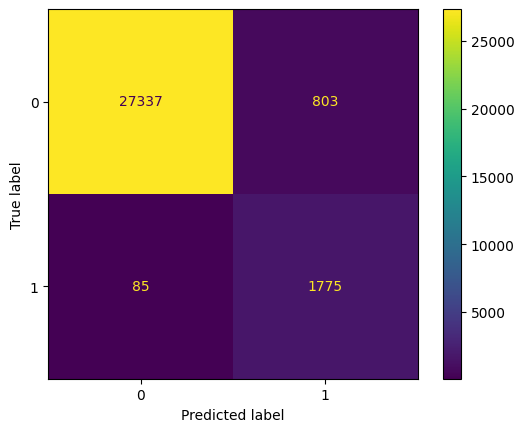

In [35]:
model2=rf.fit(X_train,y_train)
y_pred=model2.predict(X_test)
print(classification_report(y_pred,y_test))
print(ConfusionMatrixDisplay.from_predictions(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     28153
           1       0.70      0.97      0.81      1847

    accuracy                           0.97     30000
   macro avg       0.85      0.97      0.90     30000
weighted avg       0.98      0.97      0.97     30000



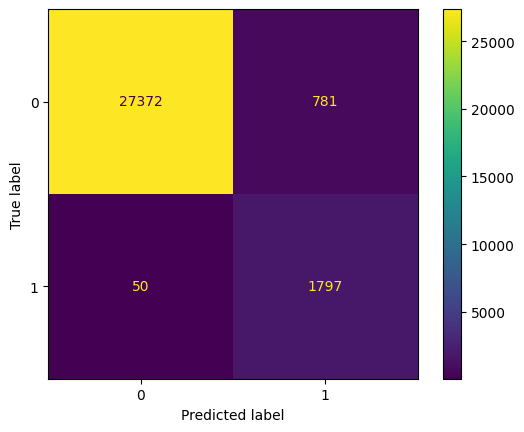

In [36]:
model3=ada.fit(X_train,y_train)
y_pred=model3.predict(X_test)
print(classification_report(y_pred,y_test))
print(ConfusionMatrixDisplay.from_predictions(y_pred,y_test))

In [37]:
model4=lr.fit(X_train,y_train)
y_pred=model4.predict(X_test)
print("R2_score:",r2_score(y_pred,y_test))
print("MAE:",mean_absolute_error(y_pred,y_test))
print("MSE:",mean_squared_error(y_pred,y_test))

R2_score: -0.8969435150158198
MAE: 0.1541127994757067
MSE: 0.050939936605942725


In [38]:
model6=dt.fit(X_train,y_train)
y_pred=model6.predict(X_test)
print("R2_score:",r2_score(y_pred,y_test))
print("MAE:",mean_absolute_error(y_pred,y_test))
print("MSE:",mean_squared_error(y_pred,y_test))

R2_score: 0.4188184118106679
MAE: 0.04686666666666667
MSE: 0.04686666666666667
